In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/home/ngrav/project/')
from wearables.scripts import utils as wearutils
from wearables.scripts import data_v42 as weardata
from wearables.scripts import models_v42 as wearmodels
from wearables.scripts import train_v42 as weartrain
from wearables.scripts import eval_v42 as weareval

import torch

import numpy as np

In [43]:
import importlib
importlib.reload(weartrain)

<module 'wearables.scripts.train_v42' from '/home/ngrav/project/wearables/scripts/train_v42.py'>

In [2]:
# model
# net = wearmodels.InceptionTime(2, 1, bottleneck=8, kernel_size=5,
#                                nb_filters=512, residual=True, nb_layers=16)
net = wearmodels.CNN(2, 10080, 1, [(1, 32), (1, 64), (1, 128), (3, 256)])

## double chk size
# print(wearutils.estimate_model_mem(net))

In [3]:
trainer = weartrain.train(net,  
                          load_splits=None,
                          n_epochs=5000,
                          batch_size=32,
                          lr=1e-6,
                          device=torch.device('cuda:0'))

In [4]:
trainer.fit()


Starting training after 5-s of setup...


/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0	<loss>=478.1627	<loss_val>=472.5576	in 9-s	elapsed: 0.2-min
Epoch 1	<loss>=469.6936	<loss_val>=463.6846	in 8-s	elapsed: 0.4-min
Epoch 2	<loss>=454.8478	<loss_val>=445.3220	in 9-s	elapsed: 0.5-min
Epoch 3	<loss>=433.7810	<loss_val>=424.2053	in 9-s	elapsed: 0.7-min
Epoch 4	<loss>=406.5967	<loss_val>=393.3212	in 9-s	elapsed: 0.8-min
Epoch 5	<loss>=370.4404	<loss_val>=344.5376	in 9-s	elapsed: 0.9-min
Epoch 6	<loss>=324.1535	<loss_val>=294.5283	in 9-s	elapsed: 1.1-min
Epoch 7	<loss>=271.8215	<loss_val>=240.9623	in 11-s	elapsed: 1.3-min
Epoch 8	<loss>=219.5936	<loss_val>=191.7096	in 8-s	elapsed: 1.4-min
Epoch 9	<loss>=171.4851	<loss_val>=154.6223	in 8-s	elapsed: 1.5-min
Epoch 10	<loss>=139.9891	<loss_val>=129.1199	in 8-s	elapsed: 1.7-min
Epoch 11	<loss>=123.1397	<loss_val>=118.3462	in 8-s	elapsed: 1.8-min
Epoch 12	<loss>=118.1065	<loss_val>=117.9872	in 9-s	elapsed: 1.9-min
Epoch 13	<loss>=115.9962	<loss_val>=117.2849	in 9-s	elapsed: 2.1-min
Epoch 14	<loss>=112.9616	<loss_val>=115.614

In [5]:
evaluation = weareval.eval_trained(trainer, 
                                   out_file='/home/ngrav/project/wearables/results/eval_test_v42.csv')

In [44]:
# with L1 and MSE
trainer = weartrain.train(net, exp='CNNMSEl1',
                          criterion=weartrain.MSEL1(), 
                          trial=1,
                          load_splits=None,
                          n_epochs=5000,
                          batch_size=32,
                          lr=1e-6,
                          device=torch.device('cuda:0'))
trainer.fit()


Starting training after 4-s of setup...
Epoch 0	<loss>=126.7026	<loss_val>=118.4797	in 9-s	elapsed: 0.2-min
Epoch 1	<loss>=123.7203	<loss_val>=116.2933	in 9-s	elapsed: 0.4-min
Epoch 2	<loss>=121.7879	<loss_val>=117.1485	in 9-s	elapsed: 0.5-min
Epoch 3	<loss>=122.7615	<loss_val>=112.9997	in 9-s	elapsed: 0.7-min
Epoch 4	<loss>=120.1836	<loss_val>=113.4404	in 9-s	elapsed: 0.8-min
Epoch 5	<loss>=118.9713	<loss_val>=114.0031	in 9-s	elapsed: 1.0-min
Epoch 6	<loss>=120.8913	<loss_val>=113.1227	in 12-s	elapsed: 1.2-min
Epoch 7	<loss>=118.6447	<loss_val>=115.8722	in 10-s	elapsed: 1.3-min
Epoch 8	<loss>=118.5551	<loss_val>=113.0142	in 10-s	elapsed: 1.5-min
Epoch 9	<loss>=117.2071	<loss_val>=114.0055	in 10-s	elapsed: 1.7-min
Epoch 10	<loss>=116.3979	<loss_val>=114.1288	in 10-s	elapsed: 1.9-min
Epoch 11	<loss>=117.9967	<loss_val>=111.4975	in 10-s	elapsed: 2.0-min
Epoch 12	<loss>=115.7878	<loss_val>=112.1820	in 11-s	elapsed: 2.2-min
Epoch 13	<loss>=115.8512	<loss_val>=111.7562	in 10-s	elapsed: 2.4

In [48]:
if 'MSELoss' in str(trainer.criterion.__class__):
    print('here')

In [49]:
import importlib
importlib.reload(weareval)

<module 'wearables.scripts.eval_v42' from '/home/ngrav/project/wearables/scripts/eval_v42.py'>

In [50]:
evaluation = weareval.eval_trained(trainer, 
                                   out_file='/home/ngrav/project/wearables/results/eval_test_v42.csv')

here


# dev

In [42]:
str(nn.MSELoss().__class__)

"<class 'torch.nn.modules.loss.MSELoss'>"

In [8]:
import torch
import torch.nn as nn

In [38]:
class MSEL1(nn.Module):
    def __init__(self, lambda_l1=0.001):
        super().__init__()
        self.lambda_l1 = lambda_l1
        self.MSE = nn.MSELoss()
        
    def L1(self, params):
        return sum(p.abs().sum() for p in params)
    
    def forward(self, output, target, params):
        return self.MSE(output, target) + self.lambda_l1*self.L1(params)
        

In [40]:
MSEL1(lambda_l1=0)(evaluation.yhat, evaluation.y, net.parameters())

tensor(152.4242, grad_fn=<AddBackward0>)

In [31]:
params = net.parameters()
count = 0
for i, p in enumerate(params):
    count += p.abs().sum()

In [32]:
count

tensor(79582.5000, grad_fn=<AddBackward0>)

In [11]:
# test
device = torch.device('cpu')
trainer.model.to(device)
trainer.model.eval()
if True: # switch for set to analyze
    dataloader = trainer.data.test_dl

for i, batch in enumerate(dataloader):
    x, y, idx = batch['x'], batch['y'], batch['id']

    output = trainer.model(x)
    if trainer.data.tasktype == 'regression':
        output = output.squeeze()
    if i==0:
        y_total = y.detach()
        idx_total = idx
        yhat_total = output.detach()
    else:
        y_total = torch.cat((y_total, y.detach()), dim=0)
        idx_total = idx_total + idx
        yhat_total = torch.cat((yhat_total, output.detach()), dim=0)
loss_test = trainer.criterion(yhat_total, y_total).item()

In [12]:
loss_test

88.0103988647461

In [18]:
(y_total - yhat_total).abs().mean().item()

8.121149063110352

In [19]:
from scipy.stats import spearmanr

In [21]:
spearmanr(y_total, yhat_total)

SpearmanrResult(correlation=0.3109129103839624, pvalue=2.995345883681129e-18)

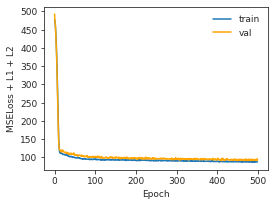

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(trainer.loss)), trainer.loss, label='train')
ax.plot(np.arange(len(trainer.loss_val)), trainer.loss_val, label='val', color='orange')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('MSELoss + L1 + L2')
fig.savefig('/home/ngrav/project/wearables/results/CNN_GA_0_losscurves.png')

In [29]:
trainer.model

CNN(
  (vgg): Sequential(
    (0): Sequential(
      (0): Conv1d(2, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
 

In [33]:
trainer.model.to(torch.device('cuda:0'))

CNN(
  (vgg): Sequential(
    (0): Sequential(
      (0): Conv1d(2, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
 

In [34]:
trainer.model = trainer.model.to(torch.device('cuda:0'))

In [37]:
torch.save(trainer.model.state_dict(), '/home/ngrav/scratch/test.pkl')

In [38]:
trainer.model.load_state_dict(torch.load('/home/ngrav/scratch/test.pkl', map_location=torch.device('cpu')))

<All keys matched successfully>

In [77]:
import importlib
importlib.reload(weareval)

<module 'wearables.scripts.eval_v42' from '/home/ngrav/project/wearables/scripts/eval_v42.py'>

In [78]:
from wearables.scripts import eval_v42 as weareval
evaluation = weareval.eval_trained(trainer, 
                                   out_file='/home/ngrav/project/wearables/results/eval_test_v42.csv')

In [65]:
evaluation.results

,record_id,age_enroll,marital,gestage_by,insur,ethnicity,race,bmi_1vis,prior_ptb_all,fullterm_births,...,edinb4_1trim,edinb5_1trim,edinb6_1trim,edinb7_1trim,edinb8_1trim,edinb9_1trim,edinb10_1trim,id,y,yhat
0,1620.0,34.0,0.0,4.0,3.0,0.0,1.0,29.280067,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1620_8,tensor(8.),tensor(19.4009)
1,2174.0,22.0,1.0,2.0,3.0,0.0,0.0,28.575377,0.0,1.0,...,3.0,3.0,3.0,1.0,1.0,1.0,1.0,2174_24,tensor(24.),tensor(21.9032)
2,1126.0,18.0,0.0,1.0,1.0,0.0,0.0,54.132374,0.0,0.0,...,3.0,2.0,3.0,3.0,2.0,3.0,1.0,1126_10,tensor(10.),tensor(19.1752)
3,2278.0,29.0,1.0,2.0,3.0,0.0,0.0,23.683273,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2278_10,tensor(10.),tensor(17.8081)
4,2311.0,18.0,0.0,2.0,3.0,0.0,1.0,35.355957,0.0,0.0,...,2.0,3.0,3.0,3.0,2.0,2.0,1.0,2311_22,tensor(22.),tensor(21.0674)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2488.0,36.0,0.0,2.0,3.0,0.0,0.0,37.115395,0.0,1.0,...,4.0,1.0,3.0,1.0,2.0,2.0,1.0,2488_34,tensor(34.),tensor(20.4559)
745,1319.0,32.0,0.0,1.0,1.0,0.0,1.0,37.401787,0.0,0.0,...,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1319_10,tensor(10.),tensor(19.5485)
746,1774.0,28.0,1.0,3.0,3.0,0.0,1.0,21.298285,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1774_7,tensor(7.),tensor(21.5935)
747,2528.0,32.0,1.0,2.0,3.0,0.0,0.0,19.222656,0.0,0.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2528_22,tensor(22.),tensor(23.7955)


In [67]:
trainer.exp

'CNN_GA'